# Computer Vision: Assignment 3 Part 1 - Some CNN Basics [50%]

Spring 2022 semester.

Due date: **July 1st 2022.**

## Introduction

This question is an introduction to using PyTorch for training simple neural net models. 

Two different datasets will be used: 
- MNIST digits [handwritten digits]
- CIFAR-10 [32x32 resolution color images of 10 object classes].

## Requirements

Perform this assignment in PyTorch, modifying the baseline code, producing outputs and adding required explanations - *all within this ipython notebook*.

Finally, submit this iPython notebook, including outputs, as an .ipynb file. 

## Question (1): Warmup [5%]

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand.

MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. 

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). 
The train/test split is 50k/10k.

**a)**  Use `matplotlib` and ipython notebook's visualization capabilities to display the average train and average test image of each class, for each of the two datasets.
[See this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) for hints on how to achieve this.

## Question (2): Training a Single Layer Network on MNIST [10%]

Start by running the training on MNIST. By default if you run this notebook successfully, it will train on MNIST.

This will initialize a single layer model train it on the 60,000 MNIST training images for 10 epochs (passes through the training data). 

The cross-entropy loss function computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given target.

The default values for the learning rate, batch size and number of epochs are given in the "options" cell of this notebook. Unless otherwise specified, use the default values throughout this assignment. 

Note the decrease in training loss and corresponding decrease in validation errors.

**a)** Add code to plot out the network weights as images (one for each class, of size 28 by 28) after the last epoch. (Hint thread: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) )

**b)** Reduce the number of training examples to just 50. [Hint: limit the iterator in the `train` function]. 
Paste the output into your report and explain what is happening to the model.

## Question (3): Training a Multi-Layer Network on MNIST [10%]

**a)**  Add an extra layer to the network with 1000 hidden units and a `tanh` non-linearity. [Hint: modify the `Net` class].

**b)**   Now retrain the model for 10 epochs with each of the learning rates in the set {0.01, 0.1, 1, 10} and test the resulting model. Create a figure and plot the loss curves of each of the four runs for comparison. Explain the obtained (train and test) results.

## Question (4): Training a Convolutional Network on CIFAR [15%]

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, stride 2, 16 feature maps + Tanh nonlinearity.
  - Convolution with 3 by 3 filters, (stride 1), 64 feature maps + Tanh nonlinearity.
  - Convolution with 3 by 3 filters, (stride 1), 64 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

**a)** Train it for 20 epochs on CIFAR-10 and plot the training loss curve (avg. loss per epoch) and final test loss and accuracy, when training with or without the two 3x3 convolutional layers. 

**b)**  Give a breakdown of the number of parameters (per layer) within the above model, as well as the overall number.

# **Answer (1):**
create needed blocks of code (and results) below

In [91]:
# imports
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import torchvision.models as models

import torchvision
import matplotlib.pyplot as plt
import numpy as np
import math

In [92]:
def imshow(img1, img2, dataset, label):
    img1 = img1 / 2 + 0.5  # un-normalize
    img2 = img2 / 2 + 0.5
    np_img1, np_img2 = img1.numpy(), img2.numpy()

    plt.figure()
    plt.suptitle(dataset + " dataset average: Class " + label)
    plt.subplot(1, 2, 1)
    plt.imshow(np.transpose(np_img1, (1, 2, 0)))
    plt.title('Train')
    plt.subplot(1, 2, 2)
    plt.imshow(np.transpose(np_img2, (1, 2, 0)))
    plt.title('Test')
    plt.show()

In [93]:
def show_average_images(train_loader, test_loader, dataset, labels):
    
    train_counters, test_counters = [], []
    train_results, test_results = [], []
    
    for _ in range(len(labels)):
        train_counters.append(0)
        test_counters.append(0)
        train_results.append(None)
        test_results.append(None)
    
    dataiter = iter(train_loader)
    
    while True:
        try:
            img_temp, label_temp = dataiter.next()
            
            for ind in range(len(labels)):
                if str(label_temp) == 'tensor([' + str(ind) + '])':
                    train_counters[ind] += 1
                    if train_results[ind] is None:
                        train_results[ind] = img_temp
                    else:
                        train_results[ind] += img_temp

        except StopIteration:
            break

    dataiter = iter(test_loader)
    
    while True:
        try:
            img_temp, label_temp = dataiter.next()
            
            for ind in range(len(labels)):
                if str(label_temp) == 'tensor([' + str(ind) + '])':
                    test_counters[ind] += 1
                    if test_results[ind] is None:
                        test_results[ind] = img_temp
                    else:
                        test_results[ind] += img_temp

        except StopIteration:
            break
    
    for index, label in enumerate(labels):
        
        test_results[index] /= test_counters[index]
        train_results[index] /= train_counters[index]

        imshow(torchvision.utils.make_grid(train_results[index]), torchvision.utils.make_grid(test_results[index]), 
               dataset, labels[index])

Files already downloaded and verified
Files already downloaded and verified


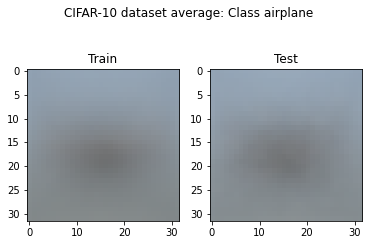

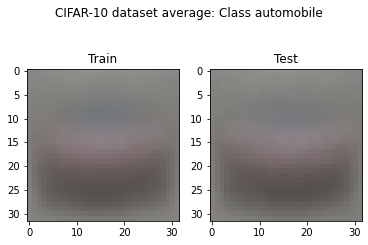

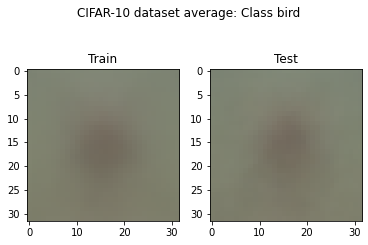

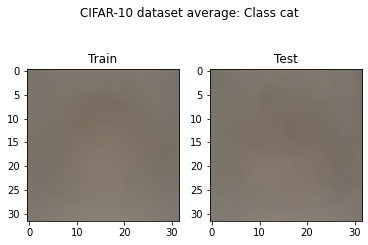

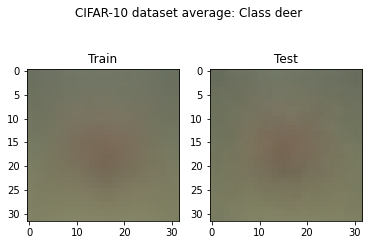

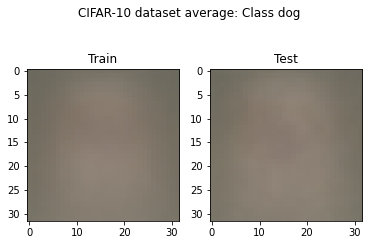

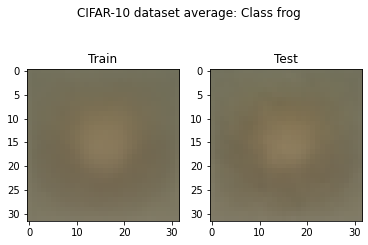

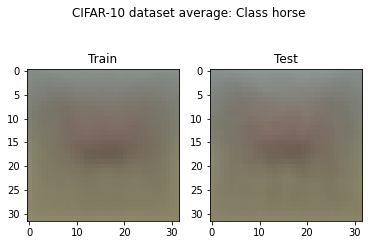

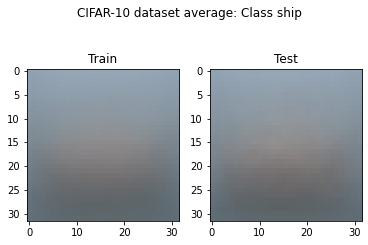

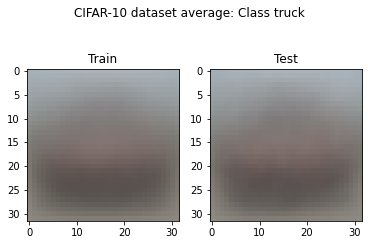

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


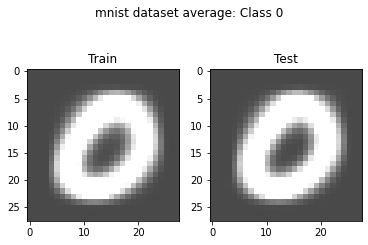

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


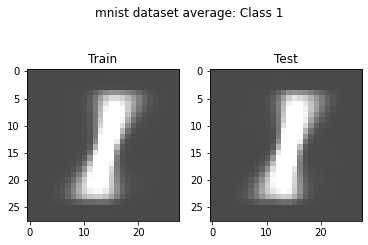

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


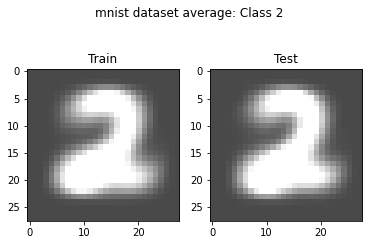

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


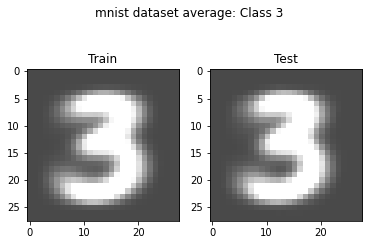

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


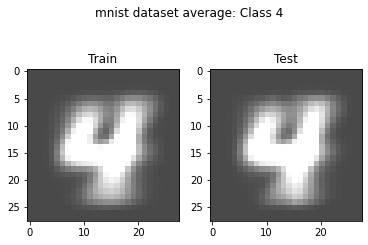

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


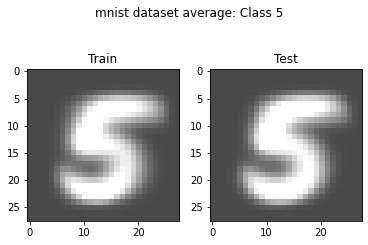

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


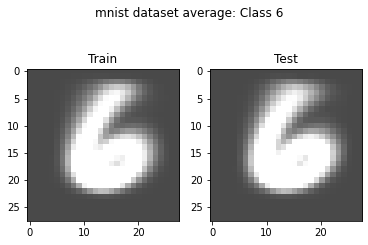

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


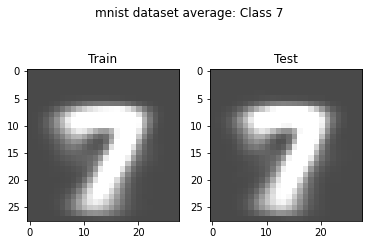

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


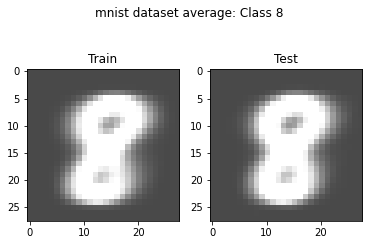

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


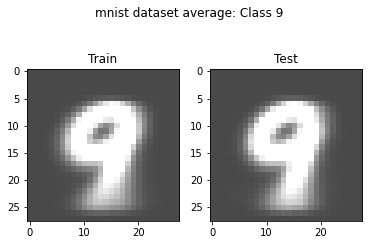

In [94]:
torch.utils.data.DataLoader.num_worker = 0

cifar_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

mnist_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))])

cifar_train = torchvision.datasets.CIFAR10(root='.', train=True,
                                           download=True, transform=cifar_transform)

cifar_train_loader = torch.utils.data.DataLoader(cifar_train, batch_size=1,
                                                 shuffle=True, num_workers=2)

cifar_test = torchvision.datasets.CIFAR10(root='.', train=False,
                                          download=True, transform=cifar_transform)

cifar_test_loader = torch.utils.data.DataLoader(cifar_test, batch_size=1,
                                                shuffle=False, num_workers=2)

mnist_train = torchvision.datasets.MNIST(root='.', train=True,
                                         download=True, transform=mnist_transform)

mnist_train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=1,
                                                 shuffle=True, num_workers=2)

mnist_test = torchvision.datasets.MNIST(root='.', train=False,
                                        download=True, transform=mnist_transform)

mnist_test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=1,
                                                shuffle=False, num_workers=2)

cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

show_average_images(cifar_train_loader, cifar_test_loader, 'CIFAR-10', cifar_labels)
show_average_images(mnist_train_loader, mnist_test_loader, 'mnist', mnist_labels)

# **Answer (2):**
create needed blocks of code (and results) below

In [95]:
# options
dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01        # learning rate

In [96]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [97]:
# train and test functions
def train(epoch, train_loader):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(test_loader):
    test_loss_curve=[]
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        test_loss_curve.append(F.cross_entropy(output, target, reduction='sum').item())
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return test_loss_curve

In [98]:
# Training and testing 
for i in range(1, epochs+1):
  train(i, mnist_train_loader)

# resetting the value of batch size in the DataLoader objects
cifar_train_loader = torch.utils.data.DataLoader(cifar_train, batch_size=batch_size,
                                                 shuffle=True, num_workers=2)

cifar_test_loader = torch.utils.data.DataLoader(cifar_test, batch_size=batch_size,
                                                shuffle=False, num_workers=2)

mnist_train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size,
                                                 shuffle=True, num_workers=2)

mnist_test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size,
                                                shuffle=False, num_workers=2)

test(mnist_test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.723711
Train Epoch: 1 [100/60000 (0%)]	Loss: 0.040512
Train Epoch: 1 [200/60000 (0%)]	Loss: 2.675906
Train Epoch: 1 [300/60000 (0%)]	Loss: 0.102242
Train Epoch: 1 [400/60000 (1%)]	Loss: 0.000222
Train Epoch: 1 [500/60000 (1%)]	Loss: 0.022581
Train Epoch: 1 [600/60000 (1%)]	Loss: 0.000977
Train Epoch: 1 [700/60000 (1%)]	Loss: 0.250521
Train Epoch: 1 [800/60000 (1%)]	Loss: 0.001523
Train Epoch: 1 [900/60000 (2%)]	Loss: 0.047376
Train Epoch: 1 [1000/60000 (2%)]	Loss: 0.000000
Train Epoch: 1 [1100/60000 (2%)]	Loss: 0.500600
Train Epoch: 1 [1200/60000 (2%)]	Loss: 0.000428
Train Epoch: 1 [1300/60000 (2%)]	Loss: 0.013785
Train Epoch: 1 [1400/60000 (2%)]	Loss: 0.000016
Train Epoch: 1 [1500/60000 (2%)]	Loss: 0.001438
Train Epoch: 1 [1600/60000 (3%)]	Loss: 0.043352
Train Epoch: 1 [1700/60000 (3%)]	Loss: 0.000271
Train Epoch: 1 [1800/60000 (3%)]	Loss: 0.670675
Train Epoch: 1 [1900/60000 (3%)]	Loss: 6.978223
Train Epoch: 1 [2000/60000 (3%)]	Loss: 4.848209
Trai

Train Epoch: 1 [17300/60000 (29%)]	Loss: 5.455759
Train Epoch: 1 [17400/60000 (29%)]	Loss: 0.000073
Train Epoch: 1 [17500/60000 (29%)]	Loss: 0.000084
Train Epoch: 1 [17600/60000 (29%)]	Loss: 0.004514
Train Epoch: 1 [17700/60000 (30%)]	Loss: 0.000676
Train Epoch: 1 [17800/60000 (30%)]	Loss: 0.000000
Train Epoch: 1 [17900/60000 (30%)]	Loss: 0.000000
Train Epoch: 1 [18000/60000 (30%)]	Loss: 0.000000
Train Epoch: 1 [18100/60000 (30%)]	Loss: 0.000005
Train Epoch: 1 [18200/60000 (30%)]	Loss: 0.000000
Train Epoch: 1 [18300/60000 (30%)]	Loss: 0.000376
Train Epoch: 1 [18400/60000 (31%)]	Loss: 0.000008
Train Epoch: 1 [18500/60000 (31%)]	Loss: 0.003083
Train Epoch: 1 [18600/60000 (31%)]	Loss: 0.000000
Train Epoch: 1 [18700/60000 (31%)]	Loss: 0.000024
Train Epoch: 1 [18800/60000 (31%)]	Loss: 0.000000
Train Epoch: 1 [18900/60000 (32%)]	Loss: 0.000046
Train Epoch: 1 [19000/60000 (32%)]	Loss: 0.000000
Train Epoch: 1 [19100/60000 (32%)]	Loss: 0.000000
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.000416


Train Epoch: 1 [34100/60000 (57%)]	Loss: 0.005168
Train Epoch: 1 [34200/60000 (57%)]	Loss: 0.000936
Train Epoch: 1 [34300/60000 (57%)]	Loss: 0.000000
Train Epoch: 1 [34400/60000 (57%)]	Loss: 0.000002
Train Epoch: 1 [34500/60000 (58%)]	Loss: 0.000000
Train Epoch: 1 [34600/60000 (58%)]	Loss: 0.000040
Train Epoch: 1 [34700/60000 (58%)]	Loss: 0.056340
Train Epoch: 1 [34800/60000 (58%)]	Loss: 2.643680
Train Epoch: 1 [34900/60000 (58%)]	Loss: 0.016119
Train Epoch: 1 [35000/60000 (58%)]	Loss: 0.928429
Train Epoch: 1 [35100/60000 (58%)]	Loss: 0.000000
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.075575
Train Epoch: 1 [35300/60000 (59%)]	Loss: 10.619372
Train Epoch: 1 [35400/60000 (59%)]	Loss: 0.000000
Train Epoch: 1 [35500/60000 (59%)]	Loss: 2.638478
Train Epoch: 1 [35600/60000 (59%)]	Loss: 0.000003
Train Epoch: 1 [35700/60000 (60%)]	Loss: 0.000000
Train Epoch: 1 [35800/60000 (60%)]	Loss: 8.376662
Train Epoch: 1 [35900/60000 (60%)]	Loss: 7.632193
Train Epoch: 1 [36000/60000 (60%)]	Loss: 0.000000

Train Epoch: 1 [50500/60000 (84%)]	Loss: 0.014493
Train Epoch: 1 [50600/60000 (84%)]	Loss: 0.000000
Train Epoch: 1 [50700/60000 (84%)]	Loss: 0.000000
Train Epoch: 1 [50800/60000 (85%)]	Loss: 0.000093
Train Epoch: 1 [50900/60000 (85%)]	Loss: 0.000000
Train Epoch: 1 [51000/60000 (85%)]	Loss: 0.000000
Train Epoch: 1 [51100/60000 (85%)]	Loss: 0.016798
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.007410
Train Epoch: 1 [51300/60000 (86%)]	Loss: 0.588931
Train Epoch: 1 [51400/60000 (86%)]	Loss: 0.186149
Train Epoch: 1 [51500/60000 (86%)]	Loss: 0.000034
Train Epoch: 1 [51600/60000 (86%)]	Loss: 0.000000
Train Epoch: 1 [51700/60000 (86%)]	Loss: 3.486749
Train Epoch: 1 [51800/60000 (86%)]	Loss: 0.000000
Train Epoch: 1 [51900/60000 (86%)]	Loss: 0.003288
Train Epoch: 1 [52000/60000 (87%)]	Loss: 4.029119
Train Epoch: 1 [52100/60000 (87%)]	Loss: 0.000043
Train Epoch: 1 [52200/60000 (87%)]	Loss: 18.458483
Train Epoch: 1 [52300/60000 (87%)]	Loss: 0.174468
Train Epoch: 1 [52400/60000 (87%)]	Loss: 0.000128

Train Epoch: 2 [7600/60000 (13%)]	Loss: 0.155639
Train Epoch: 2 [7700/60000 (13%)]	Loss: 0.007447
Train Epoch: 2 [7800/60000 (13%)]	Loss: 0.000004
Train Epoch: 2 [7900/60000 (13%)]	Loss: 0.000227
Train Epoch: 2 [8000/60000 (13%)]	Loss: 0.004194
Train Epoch: 2 [8100/60000 (14%)]	Loss: 2.416384
Train Epoch: 2 [8200/60000 (14%)]	Loss: 0.001737
Train Epoch: 2 [8300/60000 (14%)]	Loss: 0.002926
Train Epoch: 2 [8400/60000 (14%)]	Loss: 0.000000
Train Epoch: 2 [8500/60000 (14%)]	Loss: 0.000012
Train Epoch: 2 [8600/60000 (14%)]	Loss: 0.000000
Train Epoch: 2 [8700/60000 (14%)]	Loss: 0.000000
Train Epoch: 2 [8800/60000 (15%)]	Loss: 0.000000
Train Epoch: 2 [8900/60000 (15%)]	Loss: 0.000011
Train Epoch: 2 [9000/60000 (15%)]	Loss: 1.359338
Train Epoch: 2 [9100/60000 (15%)]	Loss: 0.000000
Train Epoch: 2 [9200/60000 (15%)]	Loss: 0.000000
Train Epoch: 2 [9300/60000 (16%)]	Loss: 0.000000
Train Epoch: 2 [9400/60000 (16%)]	Loss: 0.000000
Train Epoch: 2 [9500/60000 (16%)]	Loss: 0.000000
Train Epoch: 2 [9600

Train Epoch: 2 [24200/60000 (40%)]	Loss: 0.000035
Train Epoch: 2 [24300/60000 (40%)]	Loss: 0.046951
Train Epoch: 2 [24400/60000 (41%)]	Loss: 0.001664
Train Epoch: 2 [24500/60000 (41%)]	Loss: 0.000000
Train Epoch: 2 [24600/60000 (41%)]	Loss: 0.000001
Train Epoch: 2 [24700/60000 (41%)]	Loss: 0.030040
Train Epoch: 2 [24800/60000 (41%)]	Loss: 0.000008
Train Epoch: 2 [24900/60000 (42%)]	Loss: 0.039762
Train Epoch: 2 [25000/60000 (42%)]	Loss: 6.102919
Train Epoch: 2 [25100/60000 (42%)]	Loss: 6.550903
Train Epoch: 2 [25200/60000 (42%)]	Loss: 0.000001
Train Epoch: 2 [25300/60000 (42%)]	Loss: 0.000000
Train Epoch: 2 [25400/60000 (42%)]	Loss: 0.002180
Train Epoch: 2 [25500/60000 (42%)]	Loss: 0.000229
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.034510
Train Epoch: 2 [25700/60000 (43%)]	Loss: 0.165643
Train Epoch: 2 [25800/60000 (43%)]	Loss: 0.000000
Train Epoch: 2 [25900/60000 (43%)]	Loss: 23.810080
Train Epoch: 2 [26000/60000 (43%)]	Loss: 0.000000
Train Epoch: 2 [26100/60000 (44%)]	Loss: 0.000109

Train Epoch: 2 [40800/60000 (68%)]	Loss: 0.000606
Train Epoch: 2 [40900/60000 (68%)]	Loss: 0.000000
Train Epoch: 2 [41000/60000 (68%)]	Loss: 0.000000
Train Epoch: 2 [41100/60000 (68%)]	Loss: 0.000017
Train Epoch: 2 [41200/60000 (69%)]	Loss: 0.741683
Train Epoch: 2 [41300/60000 (69%)]	Loss: 6.377889
Train Epoch: 2 [41400/60000 (69%)]	Loss: 0.000274
Train Epoch: 2 [41500/60000 (69%)]	Loss: 0.000000
Train Epoch: 2 [41600/60000 (69%)]	Loss: 0.000000
Train Epoch: 2 [41700/60000 (70%)]	Loss: 0.000002
Train Epoch: 2 [41800/60000 (70%)]	Loss: 0.000000
Train Epoch: 2 [41900/60000 (70%)]	Loss: 0.000068
Train Epoch: 2 [42000/60000 (70%)]	Loss: 0.000708
Train Epoch: 2 [42100/60000 (70%)]	Loss: 0.001066
Train Epoch: 2 [42200/60000 (70%)]	Loss: 0.000000
Train Epoch: 2 [42300/60000 (70%)]	Loss: 7.478503
Train Epoch: 2 [42400/60000 (71%)]	Loss: 0.000000
Train Epoch: 2 [42500/60000 (71%)]	Loss: 0.009763
Train Epoch: 2 [42600/60000 (71%)]	Loss: 5.666219
Train Epoch: 2 [42700/60000 (71%)]	Loss: 0.002680


Train Epoch: 2 [57400/60000 (96%)]	Loss: 0.000126
Train Epoch: 2 [57500/60000 (96%)]	Loss: 0.000000
Train Epoch: 2 [57600/60000 (96%)]	Loss: 5.294584
Train Epoch: 2 [57700/60000 (96%)]	Loss: 0.000000
Train Epoch: 2 [57800/60000 (96%)]	Loss: 0.000000
Train Epoch: 2 [57900/60000 (96%)]	Loss: 0.000005
Train Epoch: 2 [58000/60000 (97%)]	Loss: 0.000000
Train Epoch: 2 [58100/60000 (97%)]	Loss: 0.000002
Train Epoch: 2 [58200/60000 (97%)]	Loss: 0.000001
Train Epoch: 2 [58300/60000 (97%)]	Loss: 0.000012
Train Epoch: 2 [58400/60000 (97%)]	Loss: 8.225655
Train Epoch: 2 [58500/60000 (98%)]	Loss: 0.000193
Train Epoch: 2 [58600/60000 (98%)]	Loss: 0.141176
Train Epoch: 2 [58700/60000 (98%)]	Loss: 0.000000
Train Epoch: 2 [58800/60000 (98%)]	Loss: 0.000000
Train Epoch: 2 [58900/60000 (98%)]	Loss: 0.001983
Train Epoch: 2 [59000/60000 (98%)]	Loss: 0.000000
Train Epoch: 2 [59100/60000 (98%)]	Loss: 7.626870
Train Epoch: 2 [59200/60000 (99%)]	Loss: 0.000000
Train Epoch: 2 [59300/60000 (99%)]	Loss: 2.069315


Train Epoch: 3 [14500/60000 (24%)]	Loss: 0.000001
Train Epoch: 3 [14600/60000 (24%)]	Loss: 0.019299
Train Epoch: 3 [14700/60000 (24%)]	Loss: 0.000036
Train Epoch: 3 [14800/60000 (25%)]	Loss: 0.000170
Train Epoch: 3 [14900/60000 (25%)]	Loss: 0.000150
Train Epoch: 3 [15000/60000 (25%)]	Loss: 0.000000
Train Epoch: 3 [15100/60000 (25%)]	Loss: 0.000000
Train Epoch: 3 [15200/60000 (25%)]	Loss: 0.003236
Train Epoch: 3 [15300/60000 (26%)]	Loss: 0.027837
Train Epoch: 3 [15400/60000 (26%)]	Loss: 0.000000
Train Epoch: 3 [15500/60000 (26%)]	Loss: 0.435419
Train Epoch: 3 [15600/60000 (26%)]	Loss: 0.558769
Train Epoch: 3 [15700/60000 (26%)]	Loss: 9.416222
Train Epoch: 3 [15800/60000 (26%)]	Loss: 0.007409
Train Epoch: 3 [15900/60000 (26%)]	Loss: 0.000288
Train Epoch: 3 [16000/60000 (27%)]	Loss: 0.001925
Train Epoch: 3 [16100/60000 (27%)]	Loss: 0.000074
Train Epoch: 3 [16200/60000 (27%)]	Loss: 0.000005
Train Epoch: 3 [16300/60000 (27%)]	Loss: 0.000000
Train Epoch: 3 [16400/60000 (27%)]	Loss: 0.000248


Train Epoch: 3 [31000/60000 (52%)]	Loss: 0.000000
Train Epoch: 3 [31100/60000 (52%)]	Loss: 0.001086
Train Epoch: 3 [31200/60000 (52%)]	Loss: 0.000001
Train Epoch: 3 [31300/60000 (52%)]	Loss: 0.000021
Train Epoch: 3 [31400/60000 (52%)]	Loss: 0.000001
Train Epoch: 3 [31500/60000 (52%)]	Loss: 0.000022
Train Epoch: 3 [31600/60000 (53%)]	Loss: 0.000021
Train Epoch: 3 [31700/60000 (53%)]	Loss: 0.000162
Train Epoch: 3 [31800/60000 (53%)]	Loss: 0.000793
Train Epoch: 3 [31900/60000 (53%)]	Loss: 0.000000
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.000029
Train Epoch: 3 [32100/60000 (54%)]	Loss: 0.000000
Train Epoch: 3 [32200/60000 (54%)]	Loss: 0.003861
Train Epoch: 3 [32300/60000 (54%)]	Loss: 0.121827
Train Epoch: 3 [32400/60000 (54%)]	Loss: 0.000002
Train Epoch: 3 [32500/60000 (54%)]	Loss: 0.000001
Train Epoch: 3 [32600/60000 (54%)]	Loss: 4.458430
Train Epoch: 3 [32700/60000 (54%)]	Loss: 17.401073
Train Epoch: 3 [32800/60000 (55%)]	Loss: 7.414800
Train Epoch: 3 [32900/60000 (55%)]	Loss: 0.000028

Train Epoch: 3 [47600/60000 (79%)]	Loss: 0.000000
Train Epoch: 3 [47700/60000 (80%)]	Loss: 0.000085
Train Epoch: 3 [47800/60000 (80%)]	Loss: 0.000000
Train Epoch: 3 [47900/60000 (80%)]	Loss: 0.000052
Train Epoch: 3 [48000/60000 (80%)]	Loss: 1.652392
Train Epoch: 3 [48100/60000 (80%)]	Loss: 0.000098
Train Epoch: 3 [48200/60000 (80%)]	Loss: 0.000005
Train Epoch: 3 [48300/60000 (80%)]	Loss: 6.501090
Train Epoch: 3 [48400/60000 (81%)]	Loss: 2.475123
Train Epoch: 3 [48500/60000 (81%)]	Loss: 0.000000
Train Epoch: 3 [48600/60000 (81%)]	Loss: 0.005711
Train Epoch: 3 [48700/60000 (81%)]	Loss: 0.008893
Train Epoch: 3 [48800/60000 (81%)]	Loss: 0.000000
Train Epoch: 3 [48900/60000 (82%)]	Loss: 0.000000
Train Epoch: 3 [49000/60000 (82%)]	Loss: 0.232981
Train Epoch: 3 [49100/60000 (82%)]	Loss: 0.000021
Train Epoch: 3 [49200/60000 (82%)]	Loss: 23.375555
Train Epoch: 3 [49300/60000 (82%)]	Loss: 0.144054
Train Epoch: 3 [49400/60000 (82%)]	Loss: 0.000002
Train Epoch: 3 [49500/60000 (82%)]	Loss: 0.009265

Train Epoch: 4 [4200/60000 (7%)]	Loss: 0.000381
Train Epoch: 4 [4300/60000 (7%)]	Loss: 0.003359
Train Epoch: 4 [4400/60000 (7%)]	Loss: 0.000000
Train Epoch: 4 [4500/60000 (8%)]	Loss: 5.231580
Train Epoch: 4 [4600/60000 (8%)]	Loss: 1.469341
Train Epoch: 4 [4700/60000 (8%)]	Loss: 0.000000
Train Epoch: 4 [4800/60000 (8%)]	Loss: 0.000037
Train Epoch: 4 [4900/60000 (8%)]	Loss: 0.000412
Train Epoch: 4 [5000/60000 (8%)]	Loss: 0.000000
Train Epoch: 4 [5100/60000 (8%)]	Loss: 0.000015
Train Epoch: 4 [5200/60000 (9%)]	Loss: 0.613051
Train Epoch: 4 [5300/60000 (9%)]	Loss: 0.006899
Train Epoch: 4 [5400/60000 (9%)]	Loss: 0.000562
Train Epoch: 4 [5500/60000 (9%)]	Loss: 0.000000
Train Epoch: 4 [5600/60000 (9%)]	Loss: 0.000190
Train Epoch: 4 [5700/60000 (10%)]	Loss: 0.134857
Train Epoch: 4 [5800/60000 (10%)]	Loss: 0.000000
Train Epoch: 4 [5900/60000 (10%)]	Loss: 0.000005
Train Epoch: 4 [6000/60000 (10%)]	Loss: 0.000000
Train Epoch: 4 [6100/60000 (10%)]	Loss: 0.000003
Train Epoch: 4 [6200/60000 (10%)]	L

Train Epoch: 4 [21200/60000 (35%)]	Loss: 0.000002
Train Epoch: 4 [21300/60000 (36%)]	Loss: 0.000000
Train Epoch: 4 [21400/60000 (36%)]	Loss: 3.428615
Train Epoch: 4 [21500/60000 (36%)]	Loss: 0.000000
Train Epoch: 4 [21600/60000 (36%)]	Loss: 0.000000
Train Epoch: 4 [21700/60000 (36%)]	Loss: 8.649389
Train Epoch: 4 [21800/60000 (36%)]	Loss: 0.009215
Train Epoch: 4 [21900/60000 (36%)]	Loss: 0.000007
Train Epoch: 4 [22000/60000 (37%)]	Loss: 0.000000
Train Epoch: 4 [22100/60000 (37%)]	Loss: 0.000000
Train Epoch: 4 [22200/60000 (37%)]	Loss: 0.000020
Train Epoch: 4 [22300/60000 (37%)]	Loss: 0.004042
Train Epoch: 4 [22400/60000 (37%)]	Loss: 14.287005
Train Epoch: 4 [22500/60000 (38%)]	Loss: 0.063302
Train Epoch: 4 [22600/60000 (38%)]	Loss: 0.000001
Train Epoch: 4 [22700/60000 (38%)]	Loss: 0.000000
Train Epoch: 4 [22800/60000 (38%)]	Loss: 0.000000
Train Epoch: 4 [22900/60000 (38%)]	Loss: 2.479159
Train Epoch: 4 [23000/60000 (38%)]	Loss: 0.001307
Train Epoch: 4 [23100/60000 (38%)]	Loss: 0.000183

Train Epoch: 4 [37900/60000 (63%)]	Loss: 0.017159
Train Epoch: 4 [38000/60000 (63%)]	Loss: 0.000011
Train Epoch: 4 [38100/60000 (64%)]	Loss: 0.000031
Train Epoch: 4 [38200/60000 (64%)]	Loss: 0.000242
Train Epoch: 4 [38300/60000 (64%)]	Loss: 0.000000
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.000000
Train Epoch: 4 [38500/60000 (64%)]	Loss: 0.000000
Train Epoch: 4 [38600/60000 (64%)]	Loss: 25.675703
Train Epoch: 4 [38700/60000 (64%)]	Loss: 0.000648
Train Epoch: 4 [38800/60000 (65%)]	Loss: 0.005557
Train Epoch: 4 [38900/60000 (65%)]	Loss: 0.000811
Train Epoch: 4 [39000/60000 (65%)]	Loss: 0.000199
Train Epoch: 4 [39100/60000 (65%)]	Loss: 0.000000
Train Epoch: 4 [39200/60000 (65%)]	Loss: 0.184484
Train Epoch: 4 [39300/60000 (66%)]	Loss: 0.000013
Train Epoch: 4 [39400/60000 (66%)]	Loss: 0.001427
Train Epoch: 4 [39500/60000 (66%)]	Loss: 0.000019
Train Epoch: 4 [39600/60000 (66%)]	Loss: 0.000006
Train Epoch: 4 [39700/60000 (66%)]	Loss: 0.000000
Train Epoch: 4 [39800/60000 (66%)]	Loss: 0.000001

Train Epoch: 4 [54700/60000 (91%)]	Loss: 0.097942
Train Epoch: 4 [54800/60000 (91%)]	Loss: 0.053009
Train Epoch: 4 [54900/60000 (92%)]	Loss: 0.000301
Train Epoch: 4 [55000/60000 (92%)]	Loss: 0.000001
Train Epoch: 4 [55100/60000 (92%)]	Loss: 0.000000
Train Epoch: 4 [55200/60000 (92%)]	Loss: 2.323744
Train Epoch: 4 [55300/60000 (92%)]	Loss: 0.005007
Train Epoch: 4 [55400/60000 (92%)]	Loss: 0.064421
Train Epoch: 4 [55500/60000 (92%)]	Loss: 0.000000
Train Epoch: 4 [55600/60000 (93%)]	Loss: 0.000019
Train Epoch: 4 [55700/60000 (93%)]	Loss: 0.009900
Train Epoch: 4 [55800/60000 (93%)]	Loss: 0.000567
Train Epoch: 4 [55900/60000 (93%)]	Loss: 0.000089
Train Epoch: 4 [56000/60000 (93%)]	Loss: 0.000019
Train Epoch: 4 [56100/60000 (94%)]	Loss: 0.000000
Train Epoch: 4 [56200/60000 (94%)]	Loss: 0.000000
Train Epoch: 4 [56300/60000 (94%)]	Loss: 0.000000
Train Epoch: 4 [56400/60000 (94%)]	Loss: 0.000000
Train Epoch: 4 [56500/60000 (94%)]	Loss: 0.000000
Train Epoch: 4 [56600/60000 (94%)]	Loss: 0.000000


Train Epoch: 5 [11700/60000 (20%)]	Loss: 0.214052
Train Epoch: 5 [11800/60000 (20%)]	Loss: 0.003790
Train Epoch: 5 [11900/60000 (20%)]	Loss: 0.000000
Train Epoch: 5 [12000/60000 (20%)]	Loss: 0.005280
Train Epoch: 5 [12100/60000 (20%)]	Loss: 0.000084
Train Epoch: 5 [12200/60000 (20%)]	Loss: 14.805179
Train Epoch: 5 [12300/60000 (20%)]	Loss: 0.021340
Train Epoch: 5 [12400/60000 (21%)]	Loss: 0.037964
Train Epoch: 5 [12500/60000 (21%)]	Loss: 0.000023
Train Epoch: 5 [12600/60000 (21%)]	Loss: 0.759198
Train Epoch: 5 [12700/60000 (21%)]	Loss: 0.000257
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.000000
Train Epoch: 5 [12900/60000 (22%)]	Loss: 0.000000
Train Epoch: 5 [13000/60000 (22%)]	Loss: 0.000102
Train Epoch: 5 [13100/60000 (22%)]	Loss: 0.011845
Train Epoch: 5 [13200/60000 (22%)]	Loss: 0.020452
Train Epoch: 5 [13300/60000 (22%)]	Loss: 0.000000
Train Epoch: 5 [13400/60000 (22%)]	Loss: 0.000000
Train Epoch: 5 [13500/60000 (22%)]	Loss: 0.012113
Train Epoch: 5 [13600/60000 (23%)]	Loss: 4.666027

Train Epoch: 5 [28200/60000 (47%)]	Loss: 0.000000
Train Epoch: 5 [28300/60000 (47%)]	Loss: 0.000000
Train Epoch: 5 [28400/60000 (47%)]	Loss: 0.007292
Train Epoch: 5 [28500/60000 (48%)]	Loss: 0.000000
Train Epoch: 5 [28600/60000 (48%)]	Loss: 0.005947
Train Epoch: 5 [28700/60000 (48%)]	Loss: 0.000007
Train Epoch: 5 [28800/60000 (48%)]	Loss: 0.000000
Train Epoch: 5 [28900/60000 (48%)]	Loss: 0.000005
Train Epoch: 5 [29000/60000 (48%)]	Loss: 0.000532
Train Epoch: 5 [29100/60000 (48%)]	Loss: 0.000000
Train Epoch: 5 [29200/60000 (49%)]	Loss: 0.000001
Train Epoch: 5 [29300/60000 (49%)]	Loss: 0.000112
Train Epoch: 5 [29400/60000 (49%)]	Loss: 0.000000
Train Epoch: 5 [29500/60000 (49%)]	Loss: 0.000138
Train Epoch: 5 [29600/60000 (49%)]	Loss: 0.000000
Train Epoch: 5 [29700/60000 (50%)]	Loss: 0.000000
Train Epoch: 5 [29800/60000 (50%)]	Loss: 0.000000
Train Epoch: 5 [29900/60000 (50%)]	Loss: 0.000000
Train Epoch: 5 [30000/60000 (50%)]	Loss: 0.000003
Train Epoch: 5 [30100/60000 (50%)]	Loss: 0.000000


Train Epoch: 5 [44600/60000 (74%)]	Loss: 0.000544
Train Epoch: 5 [44700/60000 (74%)]	Loss: 0.000000
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.003727
Train Epoch: 5 [44900/60000 (75%)]	Loss: 0.000000
Train Epoch: 5 [45000/60000 (75%)]	Loss: 0.000001
Train Epoch: 5 [45100/60000 (75%)]	Loss: 0.000000
Train Epoch: 5 [45200/60000 (75%)]	Loss: 0.000000
Train Epoch: 5 [45300/60000 (76%)]	Loss: 12.350410
Train Epoch: 5 [45400/60000 (76%)]	Loss: 0.000000
Train Epoch: 5 [45500/60000 (76%)]	Loss: 0.000000
Train Epoch: 5 [45600/60000 (76%)]	Loss: 0.657885
Train Epoch: 5 [45700/60000 (76%)]	Loss: 0.000000
Train Epoch: 5 [45800/60000 (76%)]	Loss: 0.000000
Train Epoch: 5 [45900/60000 (76%)]	Loss: 0.000000
Train Epoch: 5 [46000/60000 (77%)]	Loss: 0.020495
Train Epoch: 5 [46100/60000 (77%)]	Loss: 0.023802
Train Epoch: 5 [46200/60000 (77%)]	Loss: 0.000000
Train Epoch: 5 [46300/60000 (77%)]	Loss: 0.002244
Train Epoch: 5 [46400/60000 (77%)]	Loss: 0.000013
Train Epoch: 5 [46500/60000 (78%)]	Loss: 0.000067

Train Epoch: 6 [1200/60000 (2%)]	Loss: 0.000030
Train Epoch: 6 [1300/60000 (2%)]	Loss: 0.000000
Train Epoch: 6 [1400/60000 (2%)]	Loss: 0.000980
Train Epoch: 6 [1500/60000 (2%)]	Loss: 0.000000
Train Epoch: 6 [1600/60000 (3%)]	Loss: 0.004580
Train Epoch: 6 [1700/60000 (3%)]	Loss: 0.000006
Train Epoch: 6 [1800/60000 (3%)]	Loss: 0.000285
Train Epoch: 6 [1900/60000 (3%)]	Loss: 0.000000
Train Epoch: 6 [2000/60000 (3%)]	Loss: 0.000000
Train Epoch: 6 [2100/60000 (4%)]	Loss: 0.000007
Train Epoch: 6 [2200/60000 (4%)]	Loss: 7.826754
Train Epoch: 6 [2300/60000 (4%)]	Loss: 0.000000
Train Epoch: 6 [2400/60000 (4%)]	Loss: 0.000002
Train Epoch: 6 [2500/60000 (4%)]	Loss: 0.000000
Train Epoch: 6 [2600/60000 (4%)]	Loss: 0.000000
Train Epoch: 6 [2700/60000 (4%)]	Loss: 0.000000
Train Epoch: 6 [2800/60000 (5%)]	Loss: 0.000898
Train Epoch: 6 [2900/60000 (5%)]	Loss: 0.000000
Train Epoch: 6 [3000/60000 (5%)]	Loss: 0.000000
Train Epoch: 6 [3100/60000 (5%)]	Loss: 0.000104
Train Epoch: 6 [3200/60000 (5%)]	Loss: 0

Train Epoch: 6 [18400/60000 (31%)]	Loss: 0.000000
Train Epoch: 6 [18500/60000 (31%)]	Loss: 0.051887
Train Epoch: 6 [18600/60000 (31%)]	Loss: 0.007691
Train Epoch: 6 [18700/60000 (31%)]	Loss: 0.000130
Train Epoch: 6 [18800/60000 (31%)]	Loss: 0.000367
Train Epoch: 6 [18900/60000 (32%)]	Loss: 0.356851
Train Epoch: 6 [19000/60000 (32%)]	Loss: 0.000063
Train Epoch: 6 [19100/60000 (32%)]	Loss: 0.000000
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.002560
Train Epoch: 6 [19300/60000 (32%)]	Loss: 0.000000
Train Epoch: 6 [19400/60000 (32%)]	Loss: 0.000000
Train Epoch: 6 [19500/60000 (32%)]	Loss: 0.227503
Train Epoch: 6 [19600/60000 (33%)]	Loss: 0.177464
Train Epoch: 6 [19700/60000 (33%)]	Loss: 0.000000
Train Epoch: 6 [19800/60000 (33%)]	Loss: 0.000036
Train Epoch: 6 [19900/60000 (33%)]	Loss: 0.000000
Train Epoch: 6 [20000/60000 (33%)]	Loss: 0.000002
Train Epoch: 6 [20100/60000 (34%)]	Loss: 0.000000
Train Epoch: 6 [20200/60000 (34%)]	Loss: 0.000000
Train Epoch: 6 [20300/60000 (34%)]	Loss: 1.790223


Train Epoch: 6 [34900/60000 (58%)]	Loss: 0.047901
Train Epoch: 6 [35000/60000 (58%)]	Loss: 0.000004
Train Epoch: 6 [35100/60000 (58%)]	Loss: 0.000000
Train Epoch: 6 [35200/60000 (59%)]	Loss: 0.000000
Train Epoch: 6 [35300/60000 (59%)]	Loss: 0.006357
Train Epoch: 6 [35400/60000 (59%)]	Loss: 0.000000
Train Epoch: 6 [35500/60000 (59%)]	Loss: 13.505515
Train Epoch: 6 [35600/60000 (59%)]	Loss: 0.000001
Train Epoch: 6 [35700/60000 (60%)]	Loss: 0.000000
Train Epoch: 6 [35800/60000 (60%)]	Loss: 0.000103
Train Epoch: 6 [35900/60000 (60%)]	Loss: 0.000000
Train Epoch: 6 [36000/60000 (60%)]	Loss: 12.714353
Train Epoch: 6 [36100/60000 (60%)]	Loss: 0.000223
Train Epoch: 6 [36200/60000 (60%)]	Loss: 0.022653
Train Epoch: 6 [36300/60000 (60%)]	Loss: 0.000003
Train Epoch: 6 [36400/60000 (61%)]	Loss: 0.006319
Train Epoch: 6 [36500/60000 (61%)]	Loss: 0.000027
Train Epoch: 6 [36600/60000 (61%)]	Loss: 0.000000
Train Epoch: 6 [36700/60000 (61%)]	Loss: 0.000000
Train Epoch: 6 [36800/60000 (61%)]	Loss: 0.00000

Train Epoch: 6 [51500/60000 (86%)]	Loss: 0.000000
Train Epoch: 6 [51600/60000 (86%)]	Loss: 0.001664
Train Epoch: 6 [51700/60000 (86%)]	Loss: 0.001832
Train Epoch: 6 [51800/60000 (86%)]	Loss: 0.000937
Train Epoch: 6 [51900/60000 (86%)]	Loss: 0.671284
Train Epoch: 6 [52000/60000 (87%)]	Loss: 0.018264
Train Epoch: 6 [52100/60000 (87%)]	Loss: 0.450287
Train Epoch: 6 [52200/60000 (87%)]	Loss: 0.007095
Train Epoch: 6 [52300/60000 (87%)]	Loss: 3.583230
Train Epoch: 6 [52400/60000 (87%)]	Loss: 0.000000
Train Epoch: 6 [52500/60000 (88%)]	Loss: 0.000000
Train Epoch: 6 [52600/60000 (88%)]	Loss: 0.065963
Train Epoch: 6 [52700/60000 (88%)]	Loss: 1.573353
Train Epoch: 6 [52800/60000 (88%)]	Loss: 0.001087
Train Epoch: 6 [52900/60000 (88%)]	Loss: 0.000000
Train Epoch: 6 [53000/60000 (88%)]	Loss: 0.000015
Train Epoch: 6 [53100/60000 (88%)]	Loss: 3.106344
Train Epoch: 6 [53200/60000 (89%)]	Loss: 0.000000
Train Epoch: 6 [53300/60000 (89%)]	Loss: 4.739133
Train Epoch: 6 [53400/60000 (89%)]	Loss: 0.065101


Train Epoch: 7 [8700/60000 (14%)]	Loss: 0.000000
Train Epoch: 7 [8800/60000 (15%)]	Loss: 3.395471
Train Epoch: 7 [8900/60000 (15%)]	Loss: 0.000001
Train Epoch: 7 [9000/60000 (15%)]	Loss: 0.008347
Train Epoch: 7 [9100/60000 (15%)]	Loss: 6.884555
Train Epoch: 7 [9200/60000 (15%)]	Loss: 0.000000
Train Epoch: 7 [9300/60000 (16%)]	Loss: 0.000013
Train Epoch: 7 [9400/60000 (16%)]	Loss: 0.000000
Train Epoch: 7 [9500/60000 (16%)]	Loss: 0.000004
Train Epoch: 7 [9600/60000 (16%)]	Loss: 0.000032
Train Epoch: 7 [9700/60000 (16%)]	Loss: 0.092194
Train Epoch: 7 [9800/60000 (16%)]	Loss: 0.000001
Train Epoch: 7 [9900/60000 (16%)]	Loss: 0.000002
Train Epoch: 7 [10000/60000 (17%)]	Loss: 0.000026
Train Epoch: 7 [10100/60000 (17%)]	Loss: 0.757037
Train Epoch: 7 [10200/60000 (17%)]	Loss: 0.001501
Train Epoch: 7 [10300/60000 (17%)]	Loss: 0.000002
Train Epoch: 7 [10400/60000 (17%)]	Loss: 0.000000
Train Epoch: 7 [10500/60000 (18%)]	Loss: 1.354745
Train Epoch: 7 [10600/60000 (18%)]	Loss: 0.000000
Train Epoch: 

Train Epoch: 7 [25300/60000 (42%)]	Loss: 0.000000
Train Epoch: 7 [25400/60000 (42%)]	Loss: 0.001509
Train Epoch: 7 [25500/60000 (42%)]	Loss: 0.004050
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.001579
Train Epoch: 7 [25700/60000 (43%)]	Loss: 0.000000
Train Epoch: 7 [25800/60000 (43%)]	Loss: 0.004932
Train Epoch: 7 [25900/60000 (43%)]	Loss: 0.003450
Train Epoch: 7 [26000/60000 (43%)]	Loss: 0.000000
Train Epoch: 7 [26100/60000 (44%)]	Loss: 0.000000
Train Epoch: 7 [26200/60000 (44%)]	Loss: 0.000001
Train Epoch: 7 [26300/60000 (44%)]	Loss: 0.002679
Train Epoch: 7 [26400/60000 (44%)]	Loss: 0.000000
Train Epoch: 7 [26500/60000 (44%)]	Loss: 0.000004
Train Epoch: 7 [26600/60000 (44%)]	Loss: 0.000000
Train Epoch: 7 [26700/60000 (44%)]	Loss: 0.010316
Train Epoch: 7 [26800/60000 (45%)]	Loss: 0.000070
Train Epoch: 7 [26900/60000 (45%)]	Loss: 0.000000
Train Epoch: 7 [27000/60000 (45%)]	Loss: 0.011402
Train Epoch: 7 [27100/60000 (45%)]	Loss: 0.000000
Train Epoch: 7 [27200/60000 (45%)]	Loss: 0.018045


Train Epoch: 7 [42100/60000 (70%)]	Loss: 0.000000
Train Epoch: 7 [42200/60000 (70%)]	Loss: 0.000000
Train Epoch: 7 [42300/60000 (70%)]	Loss: 0.000000
Train Epoch: 7 [42400/60000 (71%)]	Loss: 0.000000
Train Epoch: 7 [42500/60000 (71%)]	Loss: 5.173501
Train Epoch: 7 [42600/60000 (71%)]	Loss: 0.000076
Train Epoch: 7 [42700/60000 (71%)]	Loss: 3.089003
Train Epoch: 7 [42800/60000 (71%)]	Loss: 0.000000
Train Epoch: 7 [42900/60000 (72%)]	Loss: 14.321523
Train Epoch: 7 [43000/60000 (72%)]	Loss: 0.000000
Train Epoch: 7 [43100/60000 (72%)]	Loss: 0.061895
Train Epoch: 7 [43200/60000 (72%)]	Loss: 0.000026
Train Epoch: 7 [43300/60000 (72%)]	Loss: 0.000000
Train Epoch: 7 [43400/60000 (72%)]	Loss: 0.003146
Train Epoch: 7 [43500/60000 (72%)]	Loss: 0.000001
Train Epoch: 7 [43600/60000 (73%)]	Loss: 0.000210
Train Epoch: 7 [43700/60000 (73%)]	Loss: 0.000073
Train Epoch: 7 [43800/60000 (73%)]	Loss: 13.233445
Train Epoch: 7 [43900/60000 (73%)]	Loss: 0.000000
Train Epoch: 7 [44000/60000 (73%)]	Loss: 0.00000

Train Epoch: 7 [58600/60000 (98%)]	Loss: 0.000000
Train Epoch: 7 [58700/60000 (98%)]	Loss: 0.000000
Train Epoch: 7 [58800/60000 (98%)]	Loss: 0.000000
Train Epoch: 7 [58900/60000 (98%)]	Loss: 0.000000
Train Epoch: 7 [59000/60000 (98%)]	Loss: 0.000000
Train Epoch: 7 [59100/60000 (98%)]	Loss: 0.000119
Train Epoch: 7 [59200/60000 (99%)]	Loss: 0.000092
Train Epoch: 7 [59300/60000 (99%)]	Loss: 0.391531
Train Epoch: 7 [59400/60000 (99%)]	Loss: 0.000012
Train Epoch: 7 [59500/60000 (99%)]	Loss: 0.022430
Train Epoch: 7 [59600/60000 (99%)]	Loss: 12.516781
Train Epoch: 7 [59700/60000 (100%)]	Loss: 0.000000
Train Epoch: 7 [59800/60000 (100%)]	Loss: 0.133031
Train Epoch: 7 [59900/60000 (100%)]	Loss: 0.000000
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.000000
Train Epoch: 8 [100/60000 (0%)]	Loss: 7.353327
Train Epoch: 8 [200/60000 (0%)]	Loss: 0.000000
Train Epoch: 8 [300/60000 (0%)]	Loss: 0.210282
Train Epoch: 8 [400/60000 (1%)]	Loss: 0.006298
Train Epoch: 8 [500/60000 (1%)]	Loss: 0.000000
Train Epoch: 8 [

Train Epoch: 8 [15800/60000 (26%)]	Loss: 0.000000
Train Epoch: 8 [15900/60000 (26%)]	Loss: 0.000000
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.000742
Train Epoch: 8 [16100/60000 (27%)]	Loss: 0.954476
Train Epoch: 8 [16200/60000 (27%)]	Loss: 0.000000
Train Epoch: 8 [16300/60000 (27%)]	Loss: 0.067548
Train Epoch: 8 [16400/60000 (27%)]	Loss: 0.000007
Train Epoch: 8 [16500/60000 (28%)]	Loss: 0.001841
Train Epoch: 8 [16600/60000 (28%)]	Loss: 0.000009
Train Epoch: 8 [16700/60000 (28%)]	Loss: 0.001162
Train Epoch: 8 [16800/60000 (28%)]	Loss: 0.000001
Train Epoch: 8 [16900/60000 (28%)]	Loss: 0.000541
Train Epoch: 8 [17000/60000 (28%)]	Loss: 0.000000
Train Epoch: 8 [17100/60000 (28%)]	Loss: 0.012486
Train Epoch: 8 [17200/60000 (29%)]	Loss: 0.744311
Train Epoch: 8 [17300/60000 (29%)]	Loss: 0.000041
Train Epoch: 8 [17400/60000 (29%)]	Loss: 0.007835
Train Epoch: 8 [17500/60000 (29%)]	Loss: 0.000000
Train Epoch: 8 [17600/60000 (29%)]	Loss: 0.048727
Train Epoch: 8 [17700/60000 (30%)]	Loss: 0.000000


Train Epoch: 8 [32500/60000 (54%)]	Loss: 0.055193
Train Epoch: 8 [32600/60000 (54%)]	Loss: 0.000000
Train Epoch: 8 [32700/60000 (54%)]	Loss: 0.009316
Train Epoch: 8 [32800/60000 (55%)]	Loss: 0.000000
Train Epoch: 8 [32900/60000 (55%)]	Loss: 0.000000
Train Epoch: 8 [33000/60000 (55%)]	Loss: 1.903136
Train Epoch: 8 [33100/60000 (55%)]	Loss: 2.172537
Train Epoch: 8 [33200/60000 (55%)]	Loss: 0.000000
Train Epoch: 8 [33300/60000 (56%)]	Loss: 0.019436
Train Epoch: 8 [33400/60000 (56%)]	Loss: 6.086908
Train Epoch: 8 [33500/60000 (56%)]	Loss: 0.110020
Train Epoch: 8 [33600/60000 (56%)]	Loss: 0.000001
Train Epoch: 8 [33700/60000 (56%)]	Loss: 0.000002
Train Epoch: 8 [33800/60000 (56%)]	Loss: 0.000229
Train Epoch: 8 [33900/60000 (56%)]	Loss: 0.006982
Train Epoch: 8 [34000/60000 (57%)]	Loss: 0.000660
Train Epoch: 8 [34100/60000 (57%)]	Loss: 0.000015
Train Epoch: 8 [34200/60000 (57%)]	Loss: 0.000001
Train Epoch: 8 [34300/60000 (57%)]	Loss: 0.000055
Train Epoch: 8 [34400/60000 (57%)]	Loss: 0.000014


Train Epoch: 8 [49100/60000 (82%)]	Loss: 0.000001
Train Epoch: 8 [49200/60000 (82%)]	Loss: 0.000000
Train Epoch: 8 [49300/60000 (82%)]	Loss: 0.000000
Train Epoch: 8 [49400/60000 (82%)]	Loss: 0.140011
Train Epoch: 8 [49500/60000 (82%)]	Loss: 0.000461
Train Epoch: 8 [49600/60000 (83%)]	Loss: 0.025830
Train Epoch: 8 [49700/60000 (83%)]	Loss: 0.001845
Train Epoch: 8 [49800/60000 (83%)]	Loss: 0.000000
Train Epoch: 8 [49900/60000 (83%)]	Loss: 0.000070
Train Epoch: 8 [50000/60000 (83%)]	Loss: 0.110902
Train Epoch: 8 [50100/60000 (84%)]	Loss: 0.000008
Train Epoch: 8 [50200/60000 (84%)]	Loss: 0.000000
Train Epoch: 8 [50300/60000 (84%)]	Loss: 0.000011
Train Epoch: 8 [50400/60000 (84%)]	Loss: 0.002179
Train Epoch: 8 [50500/60000 (84%)]	Loss: 0.001566
Train Epoch: 8 [50600/60000 (84%)]	Loss: 0.000000
Train Epoch: 8 [50700/60000 (84%)]	Loss: 0.000818
Train Epoch: 8 [50800/60000 (85%)]	Loss: 19.793268
Train Epoch: 8 [50900/60000 (85%)]	Loss: 0.037557
Train Epoch: 8 [51000/60000 (85%)]	Loss: 0.000000

Train Epoch: 9 [6000/60000 (10%)]	Loss: 0.025270
Train Epoch: 9 [6100/60000 (10%)]	Loss: 0.000000
Train Epoch: 9 [6200/60000 (10%)]	Loss: 0.000008
Train Epoch: 9 [6300/60000 (10%)]	Loss: 0.000000
Train Epoch: 9 [6400/60000 (11%)]	Loss: 14.629905
Train Epoch: 9 [6500/60000 (11%)]	Loss: 0.000364
Train Epoch: 9 [6600/60000 (11%)]	Loss: 0.000000
Train Epoch: 9 [6700/60000 (11%)]	Loss: 0.000000
Train Epoch: 9 [6800/60000 (11%)]	Loss: 0.000000
Train Epoch: 9 [6900/60000 (12%)]	Loss: 0.000000
Train Epoch: 9 [7000/60000 (12%)]	Loss: 0.002699
Train Epoch: 9 [7100/60000 (12%)]	Loss: 0.000000
Train Epoch: 9 [7200/60000 (12%)]	Loss: 0.000005
Train Epoch: 9 [7300/60000 (12%)]	Loss: 2.178304
Train Epoch: 9 [7400/60000 (12%)]	Loss: 0.000175
Train Epoch: 9 [7500/60000 (12%)]	Loss: 0.002598
Train Epoch: 9 [7600/60000 (13%)]	Loss: 0.841910
Train Epoch: 9 [7700/60000 (13%)]	Loss: 0.000002
Train Epoch: 9 [7800/60000 (13%)]	Loss: 0.000002
Train Epoch: 9 [7900/60000 (13%)]	Loss: 0.001561
Train Epoch: 9 [800

Train Epoch: 9 [22500/60000 (38%)]	Loss: 0.000021
Train Epoch: 9 [22600/60000 (38%)]	Loss: 0.000000
Train Epoch: 9 [22700/60000 (38%)]	Loss: 0.000000
Train Epoch: 9 [22800/60000 (38%)]	Loss: 0.018035
Train Epoch: 9 [22900/60000 (38%)]	Loss: 0.009509
Train Epoch: 9 [23000/60000 (38%)]	Loss: 0.017164
Train Epoch: 9 [23100/60000 (38%)]	Loss: 0.000000
Train Epoch: 9 [23200/60000 (39%)]	Loss: 0.000000
Train Epoch: 9 [23300/60000 (39%)]	Loss: 0.000007
Train Epoch: 9 [23400/60000 (39%)]	Loss: 0.000000
Train Epoch: 9 [23500/60000 (39%)]	Loss: 0.000000
Train Epoch: 9 [23600/60000 (39%)]	Loss: 0.000000
Train Epoch: 9 [23700/60000 (40%)]	Loss: 0.003824
Train Epoch: 9 [23800/60000 (40%)]	Loss: 0.000000
Train Epoch: 9 [23900/60000 (40%)]	Loss: 0.000000
Train Epoch: 9 [24000/60000 (40%)]	Loss: 0.000000
Train Epoch: 9 [24100/60000 (40%)]	Loss: 0.000000
Train Epoch: 9 [24200/60000 (40%)]	Loss: 0.000011
Train Epoch: 9 [24300/60000 (40%)]	Loss: 0.000000
Train Epoch: 9 [24400/60000 (41%)]	Loss: 25.192467

Train Epoch: 9 [39300/60000 (66%)]	Loss: 0.000236
Train Epoch: 9 [39400/60000 (66%)]	Loss: 0.000000
Train Epoch: 9 [39500/60000 (66%)]	Loss: 0.000000
Train Epoch: 9 [39600/60000 (66%)]	Loss: 0.000000
Train Epoch: 9 [39700/60000 (66%)]	Loss: 0.000000
Train Epoch: 9 [39800/60000 (66%)]	Loss: 0.000001
Train Epoch: 9 [39900/60000 (66%)]	Loss: 0.704474
Train Epoch: 9 [40000/60000 (67%)]	Loss: 0.000007
Train Epoch: 9 [40100/60000 (67%)]	Loss: 0.000000
Train Epoch: 9 [40200/60000 (67%)]	Loss: 0.000000
Train Epoch: 9 [40300/60000 (67%)]	Loss: 0.000002
Train Epoch: 9 [40400/60000 (67%)]	Loss: 4.841694
Train Epoch: 9 [40500/60000 (68%)]	Loss: 0.000000
Train Epoch: 9 [40600/60000 (68%)]	Loss: 0.000002
Train Epoch: 9 [40700/60000 (68%)]	Loss: 0.000000
Train Epoch: 9 [40800/60000 (68%)]	Loss: 0.000000
Train Epoch: 9 [40900/60000 (68%)]	Loss: 0.000498
Train Epoch: 9 [41000/60000 (68%)]	Loss: 0.000089
Train Epoch: 9 [41100/60000 (68%)]	Loss: 0.000099
Train Epoch: 9 [41200/60000 (69%)]	Loss: 0.001020


Train Epoch: 9 [56000/60000 (93%)]	Loss: 1.866432
Train Epoch: 9 [56100/60000 (94%)]	Loss: 0.000009
Train Epoch: 9 [56200/60000 (94%)]	Loss: 0.000000
Train Epoch: 9 [56300/60000 (94%)]	Loss: 0.003029
Train Epoch: 9 [56400/60000 (94%)]	Loss: 0.048678
Train Epoch: 9 [56500/60000 (94%)]	Loss: 0.000000
Train Epoch: 9 [56600/60000 (94%)]	Loss: 3.994933
Train Epoch: 9 [56700/60000 (94%)]	Loss: 0.000000
Train Epoch: 9 [56800/60000 (95%)]	Loss: 0.000000
Train Epoch: 9 [56900/60000 (95%)]	Loss: 0.048491
Train Epoch: 9 [57000/60000 (95%)]	Loss: 0.004851
Train Epoch: 9 [57100/60000 (95%)]	Loss: 0.000000
Train Epoch: 9 [57200/60000 (95%)]	Loss: 0.000041
Train Epoch: 9 [57300/60000 (96%)]	Loss: 0.000018
Train Epoch: 9 [57400/60000 (96%)]	Loss: 0.000031
Train Epoch: 9 [57500/60000 (96%)]	Loss: 0.001542
Train Epoch: 9 [57600/60000 (96%)]	Loss: 44.470436
Train Epoch: 9 [57700/60000 (96%)]	Loss: 0.000000
Train Epoch: 9 [57800/60000 (96%)]	Loss: 0.000000
Train Epoch: 9 [57900/60000 (96%)]	Loss: 0.000004

Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.000000
Train Epoch: 10 [12900/60000 (22%)]	Loss: 9.624986
Train Epoch: 10 [13000/60000 (22%)]	Loss: 0.000000
Train Epoch: 10 [13100/60000 (22%)]	Loss: 0.000003
Train Epoch: 10 [13200/60000 (22%)]	Loss: 0.000000
Train Epoch: 10 [13300/60000 (22%)]	Loss: 0.000000
Train Epoch: 10 [13400/60000 (22%)]	Loss: 0.000031
Train Epoch: 10 [13500/60000 (22%)]	Loss: 0.000140
Train Epoch: 10 [13600/60000 (23%)]	Loss: 0.000000
Train Epoch: 10 [13700/60000 (23%)]	Loss: 0.000004
Train Epoch: 10 [13800/60000 (23%)]	Loss: 0.000039
Train Epoch: 10 [13900/60000 (23%)]	Loss: 0.000011
Train Epoch: 10 [14000/60000 (23%)]	Loss: 0.000021
Train Epoch: 10 [14100/60000 (24%)]	Loss: 0.200126
Train Epoch: 10 [14200/60000 (24%)]	Loss: 0.010740
Train Epoch: 10 [14300/60000 (24%)]	Loss: 0.000001
Train Epoch: 10 [14400/60000 (24%)]	Loss: 0.005602
Train Epoch: 10 [14500/60000 (24%)]	Loss: 0.000001
Train Epoch: 10 [14600/60000 (24%)]	Loss: 0.000004
Train Epoch: 10 [14700/60000 (2

Train Epoch: 10 [28900/60000 (48%)]	Loss: 0.087050
Train Epoch: 10 [29000/60000 (48%)]	Loss: 0.000037
Train Epoch: 10 [29100/60000 (48%)]	Loss: 0.000000
Train Epoch: 10 [29200/60000 (49%)]	Loss: 0.000182
Train Epoch: 10 [29300/60000 (49%)]	Loss: 0.000305
Train Epoch: 10 [29400/60000 (49%)]	Loss: 9.951200
Train Epoch: 10 [29500/60000 (49%)]	Loss: 0.000377
Train Epoch: 10 [29600/60000 (49%)]	Loss: 1.223179
Train Epoch: 10 [29700/60000 (50%)]	Loss: 1.399981
Train Epoch: 10 [29800/60000 (50%)]	Loss: 0.000022
Train Epoch: 10 [29900/60000 (50%)]	Loss: 0.000000
Train Epoch: 10 [30000/60000 (50%)]	Loss: 0.006223
Train Epoch: 10 [30100/60000 (50%)]	Loss: 0.000334
Train Epoch: 10 [30200/60000 (50%)]	Loss: 0.000000
Train Epoch: 10 [30300/60000 (50%)]	Loss: 5.027989
Train Epoch: 10 [30400/60000 (51%)]	Loss: 0.000000
Train Epoch: 10 [30500/60000 (51%)]	Loss: 0.000263
Train Epoch: 10 [30600/60000 (51%)]	Loss: 0.000001
Train Epoch: 10 [30700/60000 (51%)]	Loss: 0.000058
Train Epoch: 10 [30800/60000 (5

Train Epoch: 10 [45100/60000 (75%)]	Loss: 0.000073
Train Epoch: 10 [45200/60000 (75%)]	Loss: 0.004674
Train Epoch: 10 [45300/60000 (76%)]	Loss: 0.000000
Train Epoch: 10 [45400/60000 (76%)]	Loss: 4.476698
Train Epoch: 10 [45500/60000 (76%)]	Loss: 0.000000
Train Epoch: 10 [45600/60000 (76%)]	Loss: 2.462278
Train Epoch: 10 [45700/60000 (76%)]	Loss: 0.000244
Train Epoch: 10 [45800/60000 (76%)]	Loss: 0.000000
Train Epoch: 10 [45900/60000 (76%)]	Loss: 0.000061
Train Epoch: 10 [46000/60000 (77%)]	Loss: 0.000000
Train Epoch: 10 [46100/60000 (77%)]	Loss: 0.025386
Train Epoch: 10 [46200/60000 (77%)]	Loss: 0.000002
Train Epoch: 10 [46300/60000 (77%)]	Loss: 0.000010
Train Epoch: 10 [46400/60000 (77%)]	Loss: 0.000004
Train Epoch: 10 [46500/60000 (78%)]	Loss: 0.000001
Train Epoch: 10 [46600/60000 (78%)]	Loss: 0.000871
Train Epoch: 10 [46700/60000 (78%)]	Loss: 0.000000
Train Epoch: 10 [46800/60000 (78%)]	Loss: 0.000000
Train Epoch: 10 [46900/60000 (78%)]	Loss: 0.000001
Train Epoch: 10 [47000/60000 (7

[38.674278259277344,
 9.401611328125,
 25.434768676757812,
 39.29465103149414,
 29.564653396606445,
 76.84158325195312,
 32.508705139160156,
 59.87580108642578,
 40.10900115966797,
 62.0732421875,
 79.5427017211914,
 71.98912048339844,
 23.419666290283203,
 64.33338165283203,
 78.13994598388672,
 63.95846176147461,
 41.6098518371582,
 68.93436431884766,
 121.98432922363281,
 88.42703247070312,
 104.6689224243164,
 30.103118896484375,
 80.35841369628906,
 91.49422454833984,
 43.26565933227539,
 71.4168472290039,
 91.7729263305664,
 126.78044128417969,
 60.799686431884766,
 57.804420471191406,
 73.96788024902344,
 99.90966033935547,
 86.32087707519531,
 62.032833099365234,
 66.04312133789062,
 83.18486785888672,
 27.681549072265625,
 132.78485107421875,
 37.511783599853516,
 23.462665557861328,
 45.76945495605469,
 87.57793426513672,
 26.089242935180664,
 11.629694938659668,
 55.42386245727539,
 57.362030029296875,
 56.02408218383789,
 20.761919021606445,
 90.3673324584961,
 33.724502563

C:\Users\Karee\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_tensor.py:549: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


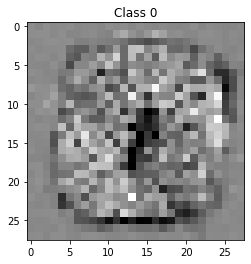

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


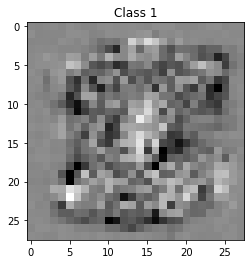

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


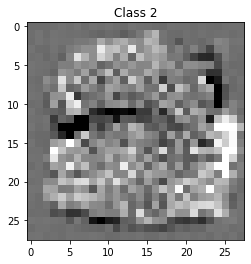

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


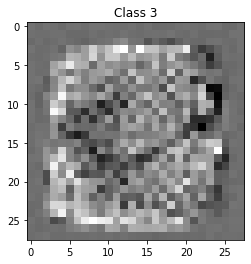

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


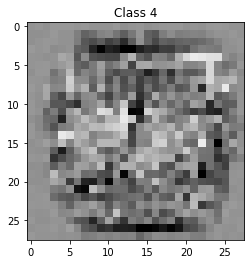

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


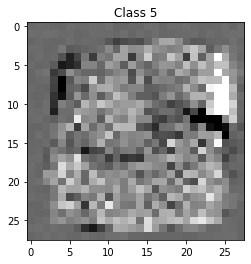

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


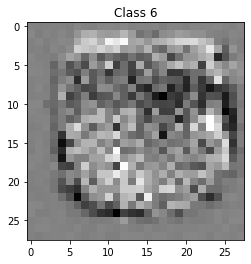

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


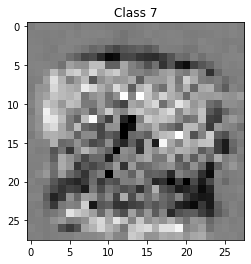

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


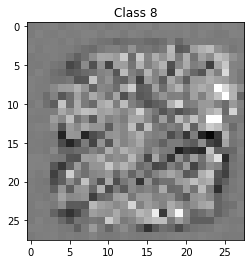

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


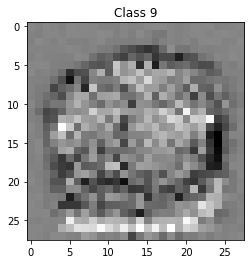

In [99]:
for parameter in network.parameters():
    for i in range(10):
        temp = torchvision.utils.make_grid(parameter[i].resize(28, 28))
        
        temp = temp / 2 + 0.5  # un-normalize
        temp_np = temp.numpy()
        
        plt.figure()
        plt.title("Class " + str(i))
        plt.imshow(np.transpose(temp_np, (1, 2, 0)))
        plt.show()
    
    break # we only need the first model parameter (weights)

In [100]:
limited_net = Net(num_inputs, num_outputs)
limited_optimizer = optim.SGD(network.parameters(), lr=lr)
# train only on 50 examples

def limited_train(epoch, train_loader):
    limited_net.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        
        if batch_idx >= 50:
            break
        
        data, target = Variable(data), Variable(target)
        limited_optimizer.zero_grad()
        output = limited_net(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        limited_optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def limited_test(test_loader):
    limited_net.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        output = limited_net(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [101]:
# we shall use the same options

for i in range(1, epochs+1):
    limited_train(i, mnist_train_loader)

limited_test(mnist_test_loader)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.333273
Train Epoch: 2 [0/60000 (0%)]	Loss: 2.342449
Train Epoch: 3 [0/60000 (0%)]	Loss: 2.331604
Train Epoch: 4 [0/60000 (0%)]	Loss: 2.468079
Train Epoch: 5 [0/60000 (0%)]	Loss: 2.538089
Train Epoch: 6 [0/60000 (0%)]	Loss: 2.375807
Train Epoch: 7 [0/60000 (0%)]	Loss: 2.472579
Train Epoch: 8 [0/60000 (0%)]	Loss: 2.384454
Train Epoch: 9 [0/60000 (0%)]	Loss: 2.368675
Train Epoch: 10 [0/60000 (0%)]	Loss: 2.569300

Test set: Average loss: 2.3999, Accuracy: 1418/10000 (14%)



# **Answer (3):**
create needed blocks of code (and results) below

In [102]:
class MultiLayerNet(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(MultiLayerNet, self).__init__()
        self.linear1 = nn.Linear(num_inputs, 1000)
        self.linear2 = nn.Linear(1000, num_outputs)

    def forward(self, x):
        x = x.view(-1, num_inputs)
        x = self.linear1(x)
        x = self.linear2(x)
        x = torch.tanh(x)
        return x

In [103]:
lr = 0.01

for i in range(4):
    print("Learning Rate: " + str(lr), end=2*'\n')
    
    network = MultiLayerNet(28 ** 2, 10)
    optimizer = optim.SGD(network.parameters(), lr=lr)

    for i in range(1, epochs+1):
        train(i, mnist_train_loader)

    test(mnist_test_loader)
    
    lr *= 10

Learning Rate: 0.01

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303533
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.332908
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.234757
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.128821
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.069643
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.102039
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.047755
Train Epoch: 1 [44800/60000 (75%)]	Loss: 1.071322
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.171837
Train Epoch: 1 [57600/60000 (96%)]	Loss: 1.001623
Train Epoch: 2 [0/60000 (0%)]	Loss: 1.016631
Train Epoch: 2 [6400/60000 (11%)]	Loss: 1.088788
Train Epoch: 2 [12800/60000 (21%)]	Loss: 1.080054
Train Epoch: 2 [19200/60000 (32%)]	Loss: 1.014847
Train Epoch: 2 [25600/60000 (43%)]	Loss: 1.036348
Train Epoch: 2 [32000/60000 (53%)]	Loss: 1.083858
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.037983
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.983259
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.968548
Train Epoch: 2 [57600/60000 (96%)]	Loss: 

Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.965680
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.931492
Train Epoch: 7 [38400/60000 (64%)]	Loss: 1.038724
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.958352
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.953354
Train Epoch: 7 [57600/60000 (96%)]	Loss: 1.011940
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.976253
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.995042
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.911823
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.997554
Train Epoch: 8 [25600/60000 (43%)]	Loss: 1.053944
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.925436
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.965145
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.929816
Train Epoch: 8 [51200/60000 (85%)]	Loss: 1.046637
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.927447
Train Epoch: 9 [0/60000 (0%)]	Loss: 0.977743
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.990878
Train Epoch: 9 [12800/60000 (21%)]	Loss: 1.033853
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.939340
Train Epoch:

Train Epoch: 3 [44800/60000 (75%)]	Loss: 2.442188
Train Epoch: 3 [51200/60000 (85%)]	Loss: 2.556901
Train Epoch: 3 [57600/60000 (96%)]	Loss: 2.378633
Train Epoch: 4 [0/60000 (0%)]	Loss: 2.674964
Train Epoch: 4 [6400/60000 (11%)]	Loss: 2.501946
Train Epoch: 4 [12800/60000 (21%)]	Loss: 2.533399
Train Epoch: 4 [19200/60000 (32%)]	Loss: 2.368747
Train Epoch: 4 [25600/60000 (43%)]	Loss: 2.499058
Train Epoch: 4 [32000/60000 (53%)]	Loss: 2.329988
Train Epoch: 4 [38400/60000 (64%)]	Loss: 2.274535
Train Epoch: 4 [44800/60000 (75%)]	Loss: 2.432909
Train Epoch: 4 [51200/60000 (85%)]	Loss: 2.410599
Train Epoch: 4 [57600/60000 (96%)]	Loss: 2.477602
Train Epoch: 5 [0/60000 (0%)]	Loss: 2.494601
Train Epoch: 5 [6400/60000 (11%)]	Loss: 2.671673
Train Epoch: 5 [12800/60000 (21%)]	Loss: 2.680228
Train Epoch: 5 [19200/60000 (32%)]	Loss: 2.690281
Train Epoch: 5 [25600/60000 (43%)]	Loss: 2.581078
Train Epoch: 5 [32000/60000 (53%)]	Loss: 2.674752
Train Epoch: 5 [38400/60000 (64%)]	Loss: 2.768135
Train Epoch:

# **Answer (4):**
create needed blocks of code (and results) below

In [104]:
dataset = 'cifar10'
lr = 0.01

In [105]:
class ConvNet(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_channels=1):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(num_inputs * num_channels, 16, 5, stride=2)
        self.conv2 = nn.Conv2d(16, 64, 3, stride=1)
        self.conv3 = nn.Conv2d(64, 64, 3, stride=1)
        self.linear1 = nn.Linear(1600, 64)
        self.linear2 = nn.Linear(64, num_outputs)
    
    def forward(self, x):
        x = self.conv1(x)
        x = torch.tanh(x)
        x = self.conv2(x)
        x = torch.tanh(x)
        x = self.conv3(x)
        x = torch.tanh(x)
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.linear1(x)
        x = torch.tanh(x)
        x = self.linear2(x)
        
        return x

In [106]:
epochs = 20 
network = ConvNet(num_inputs=1, num_outputs=10, num_channels=3)
optimizer = optim.SGD(network.parameters(), lr=lr)

for i in range(1, epochs+1):
    train(i, cifar_train_loader)
    
res = test(cifar_test_loader)

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.307354
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.267921
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.094982
Train Epoch: 1 [19200/50000 (38%)]	Loss: 2.054194
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.871470
Train Epoch: 1 [32000/50000 (64%)]	Loss: 2.094842
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.930848
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.893258
Train Epoch: 2 [0/50000 (0%)]	Loss: 1.921597
Train Epoch: 2 [6400/50000 (13%)]	Loss: 2.096041
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.966203
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.991777
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.932019
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.680307
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.678546
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.739084
Train Epoch: 3 [0/50000 (0%)]	Loss: 1.740790
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.866437
Train Epoch: 3 [12800/50000 (26%)]	Loss: 1.688670
Train Epoch: 3 [19200/50000 (38%)]	Loss: 1.699796
Train Epoch: 3 [25

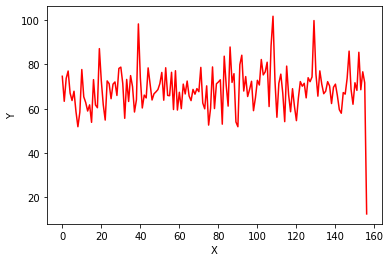

In [107]:
# for i in range(epochs-1):
#     plt.plot((i, res[i]), (i + 1, res[i + 1]))
    
# plt.show()

plt.plot(range(len(res)), res, '-', color='red')
plt.xlabel('X') # TODO: set X and Y labels
plt.ylabel('Y')

plt.show()